In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read the CSV file
file_path = 'Crop Price Prediction.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

            State   Crop  CostCultivation  CostCultivation2  Production  \
0   Uttar Pradesh  ARHAR          9794.05           9800.25     1941.55   
1       Karnataka  ARHAR         10593.15          10594.15     2172.46   
2         Gujarat  ARHAR         13468.82          13469.82     1898.30   
3  Andhra Pradesh  ARHAR         17051.66          17052.66     3670.54   
4     Maharashtra  ARHAR         17130.55          17131.55     2775.80   

   Yield  Temperature  RainFall Annual     Price  
0   9.83        28.96           3373.2  19589.10  
1   7.47        29.22           3520.7  21187.30  
2   9.59        28.47           2957.4  26938.64  
3   6.42        28.49           3079.6  34104.32  
4   8.72        28.30           2566.7  34262.10  


In [3]:
# Display the column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             49 non-null     object 
 1   Crop              49 non-null     object 
 2   CostCultivation   49 non-null     float64
 3   CostCultivation2  49 non-null     float64
 4   Production        49 non-null     float64
 5   Yield             49 non-null     float64
 6   Temperature       49 non-null     float64
 7   RainFall Annual   49 non-null     float64
 8   Price             49 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB
None


In [4]:
# Display the basic statistics of the dataset
print(df.describe())

       CostCultivation  CostCultivation2   Production        Yield  \
count        49.000000         49.000000    49.000000    49.000000   
mean      20363.537347      20364.643469  1620.537755    98.086735   
std       13561.435306      13561.350894  1104.990472   245.293123   
min        5483.540000       5484.540000    85.790000     1.320000   
25%       12774.410000      12775.410000   732.620000     9.590000   
50%       17022.000000      17023.000000  1595.560000    13.700000   
75%       24731.060000      24732.060000  2228.970000    36.610000   
max       66335.060000      66336.060000  5777.480000  1015.450000   

       Temperature  RainFall Annual          Price  
count    49.000000        49.000000      49.000000  
mean     28.780612      2951.740816   40728.074694  
std       0.246555       373.964966   27122.870613  
min      28.110000      2352.100000   10968.080000  
25%      28.660000      2687.200000   25549.820000  
50%      28.760000      2957.800000   34045.000000 

In [5]:
# Check for unique values in categorical columns
print(df['State'].unique())
print(df['Crop'].unique())

['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']
['ARHAR' 'COTTON' 'GRAM' 'GROUNDNUT' 'MAIZE' 'MOONG' 'PADDY' ' MUSTARD'
 'SUGARCANE' 'WHEAT']


In [6]:
# Check for unique values in categorical columns
print(df['State'].unique())
print(df['Crop'].unique())

['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']
['ARHAR' 'COTTON' 'GRAM' 'GROUNDNUT' 'MAIZE' 'MOONG' 'PADDY' ' MUSTARD'
 'SUGARCANE' 'WHEAT']


In [7]:
# Check for missing values in each column
print(df.isnull().sum())

State               0
Crop                0
CostCultivation     0
CostCultivation2    0
Production          0
Yield               0
Temperature         0
RainFall Annual     0
Price               0
dtype: int64


In [8]:
# If missing values exist, handle them
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

In [9]:
# Count the occurrences of each crop and state
print(df['State'].value_counts())
print(df['Crop'].value_counts())

State
Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Karnataka         5
Rajasthan         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Haryana           2
Tamil Nadu        2
Orissa            2
Bihar             1
West Bengal       1
Name: count, dtype: int64
Crop
ARHAR        5
COTTON       5
GRAM         5
GROUNDNUT    5
MAIZE        5
MOONG        5
PADDY        5
 MUSTARD     5
SUGARCANE    5
WHEAT        4
Name: count, dtype: int64


In [10]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix to understand relationships between numerical features
corr_matrix = numerical_df.corr()
print(corr_matrix)

                  CostCultivation  CostCultivation2  Production     Yield  \
CostCultivation          1.000000          1.000000   -0.434422  0.863400   
CostCultivation2         1.000000          1.000000   -0.434423  0.863403   
Production              -0.434422         -0.434423    1.000000 -0.487272   
Yield                    0.863400          0.863403   -0.487272  1.000000   
Temperature              0.060051          0.060057   -0.351284  0.276768   
RainFall Annual          0.015762          0.015771   -0.158666 -0.056728   
Price                    1.000000          1.000000   -0.434422  0.863400   

                  Temperature  RainFall Annual     Price  
CostCultivation      0.060051         0.015762  1.000000  
CostCultivation2     0.060057         0.015771  1.000000  
Production          -0.351284        -0.158666 -0.434422  
Yield                0.276768        -0.056728  0.863400  
Temperature          1.000000         0.072501  0.060051  
RainFall Annual      0.072501

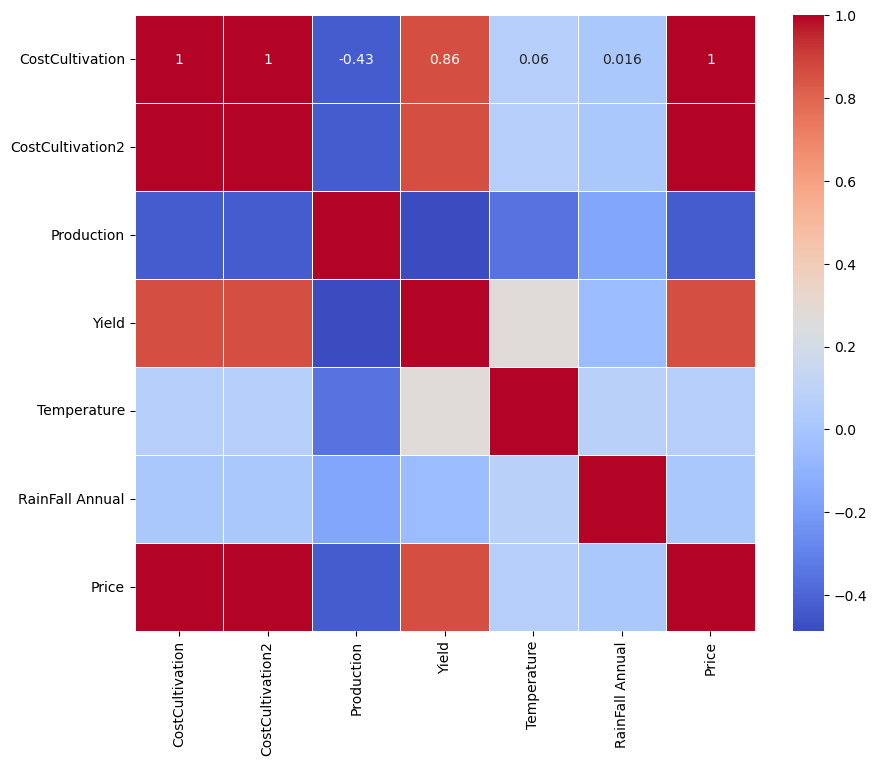

In [11]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

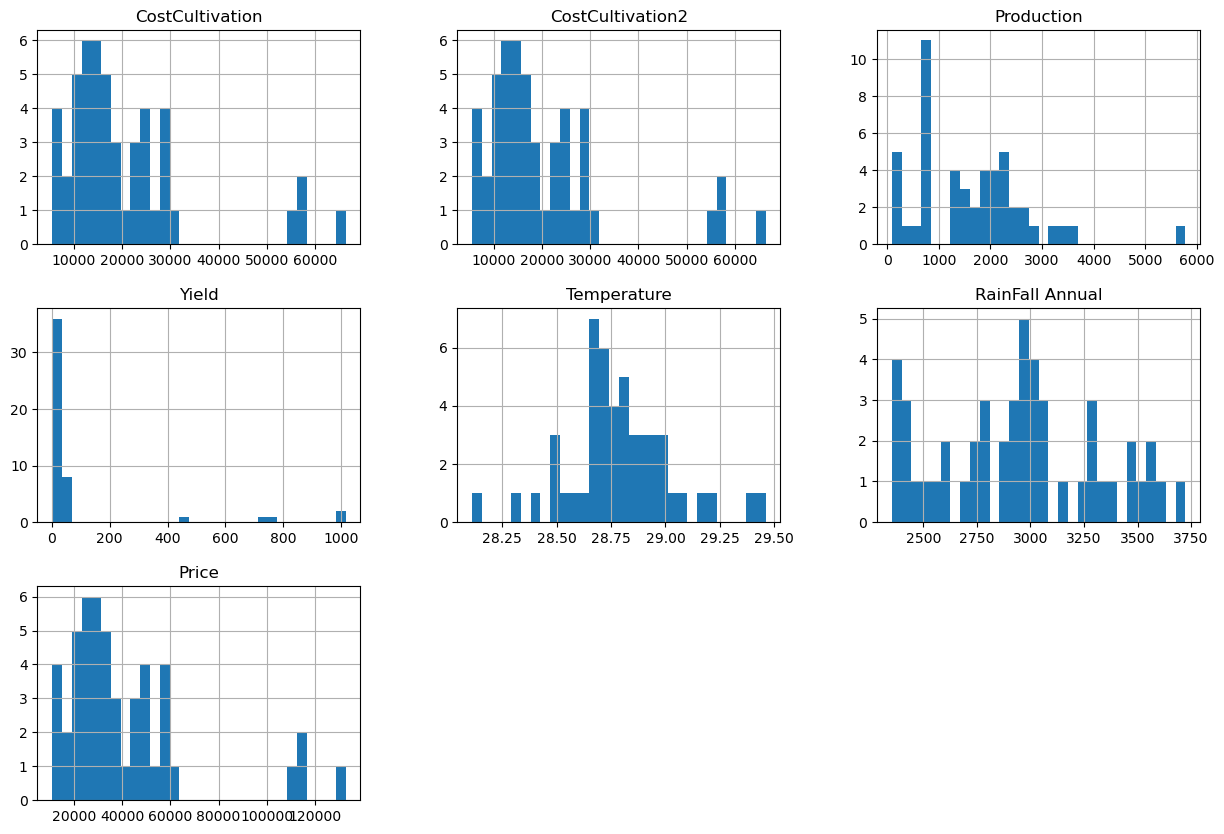

In [24]:
# Histograms to understand the distribution of numerical columns
df.hist(bins=30, figsize=(15,10))
plt.show()

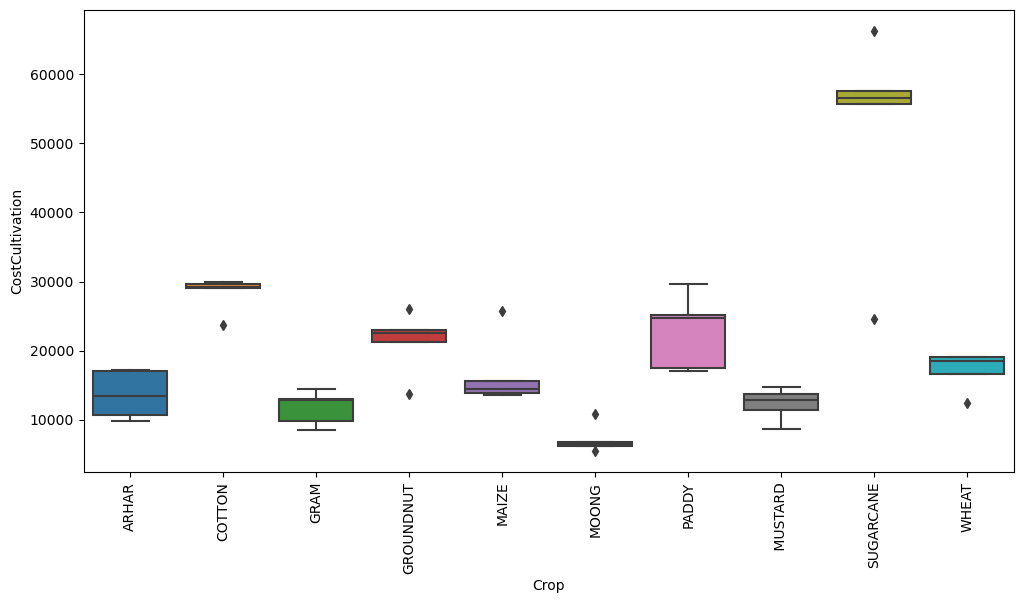

In [34]:
# Boxplot of CostCultivation by Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='CostCultivation', data=df)
plt.xticks(rotation=90)
plt.show()

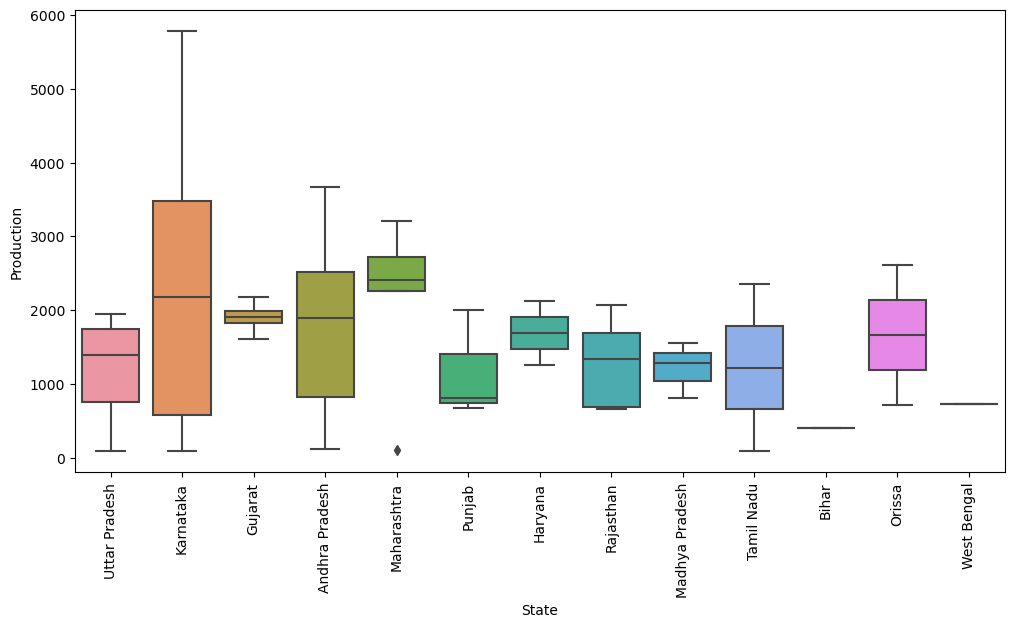

In [36]:
# Boxplot of Production by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Production', data=df)
plt.xticks(rotation=90)
plt.show()

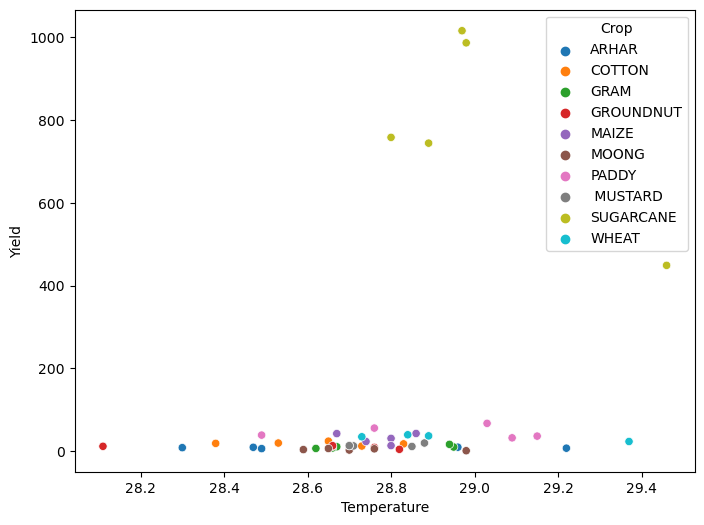

In [38]:
# Scatter plot between Temperature and Yield, colored by Crop
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Yield', hue='Crop', data=df)
plt.show()

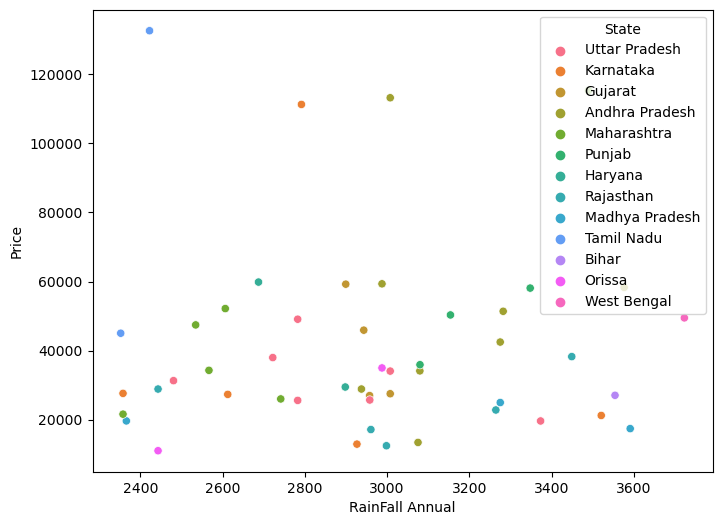

In [40]:
# Scatter plot between RainFall Annual and Price, colored by State
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RainFall Annual', y='Price', hue='State', data=df)
plt.show()

In [44]:
# Assuming 'df' is your DataFrame and 'Price' is the target variable
X = df.drop(['Price'], axis=1)
y = df['Price']

In [46]:
# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
# Predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [56]:
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 7965.786327892747
R²: 0.9450317236884265


In [58]:
print("Mean Price:", df['Price'].mean())
print("Range of Price:", df['Price'].max() - df['Price'].min())

Mean Price: 40728.07469387755
Range of Price: 121703.04


In [60]:
relative_error = (rmse / df['Price'].mean()) * 100
print(f'Relative Error: {relative_error:.2f}%')

Relative Error: 19.56%


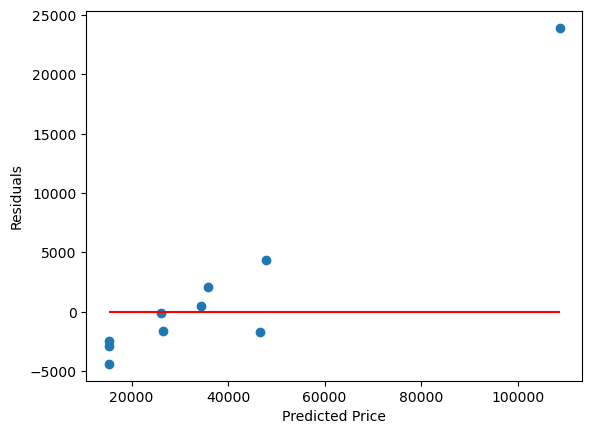

In [62]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

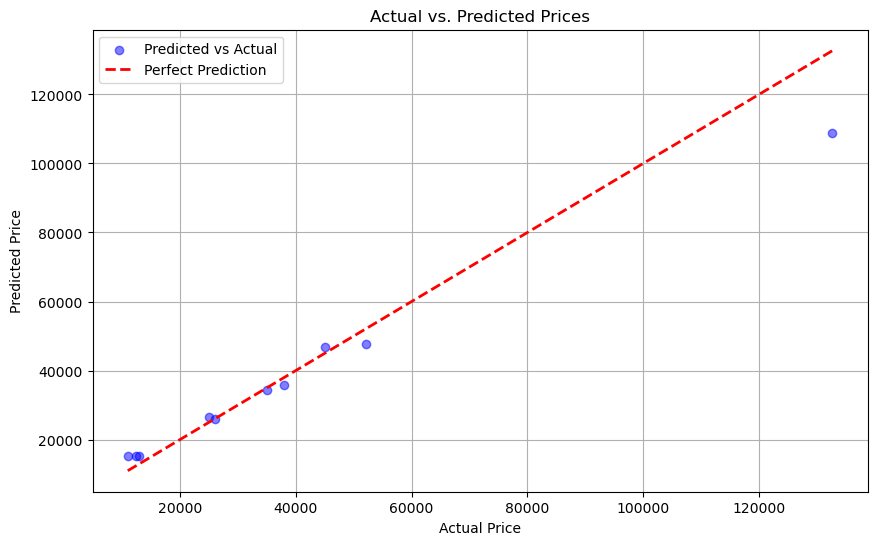

In [64]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

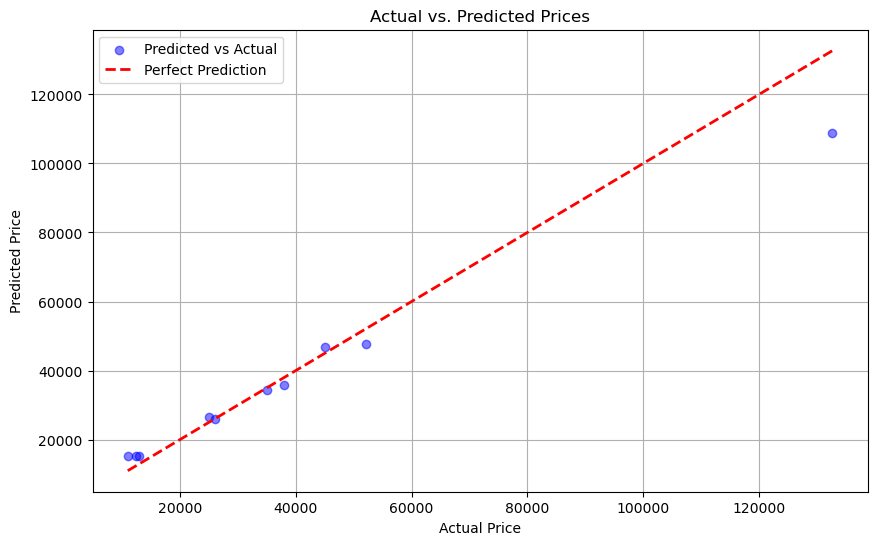

In [66]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

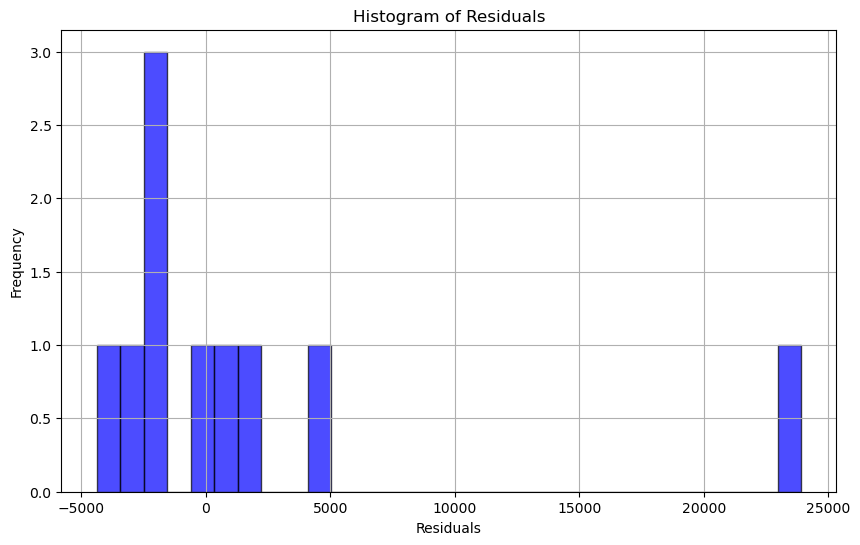

In [68]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

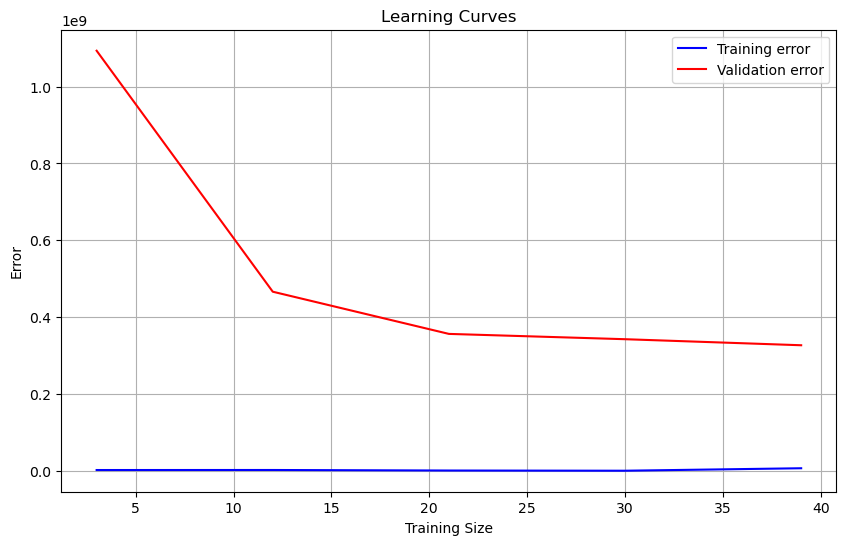

In [74]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.plot(train_sizes, validation_scores_mean, label='Validation error', color='red')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()